In [112]:
import os, sys
#sys.path.append(r'C:/Users/dg208')
sys.path.append(r'C:\Users\david\OneDrive\todo')
in_notebooks_dir = (
    (os.path.basename(os.getcwd()) == 'notebooks') and
    (os.path.exists(os.path.join(os.path.dirname(os.getcwd()), 'src')))
)
if in_notebooks_dir:
    os.chdir(os.path.dirname(os.getcwd()))

srcdir = os.path.join('..', 'src')
if srcdir not in sys.path:
    sys.path.insert(0, srcdir)

print(f" current folder is {os.getcwd()}")
%load_ext autoreload
%autoreload 2    

 current folder is c:\Users\dg208\thresh_gacc
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import pickle
from pathlib import Path

# Import training_functions so it's available as a top-level module for pickle
import sys
sys.path.insert(0, 'src')
import training_functions

# load models 

## viz heat maps

In [114]:
fn_grid_all = os.listdir(r"models")
fn_grid = []
for fn in fn_grid_all:
    m = re.match(r"results_cutoff_(\d+\.\d+)\.pkl", fn)
    if m:
        fn_grid.append([fn, float(m.group(1))])
fn_grid = sorted(fn_grid, key=lambda x: x[1])
print(f"Found {len(fn_grid)} grid search result files:")
fn_grid

Found 5 grid search result files:


[['results_cutoff_0.01.pkl', 0.01],
 ['results_cutoff_0.05.pkl', 0.05],
 ['results_cutoff_0.10.pkl', 0.1],
 ['results_cutoff_0.50.pkl', 0.5],
 ['results_cutoff_0.75.pkl', 0.75]]

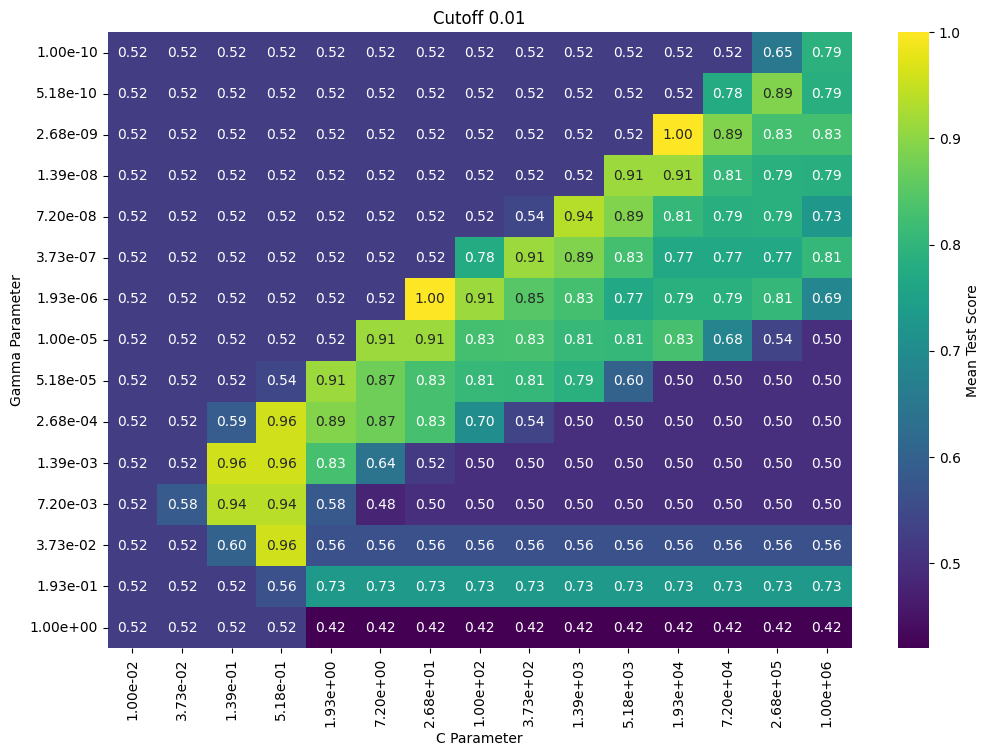

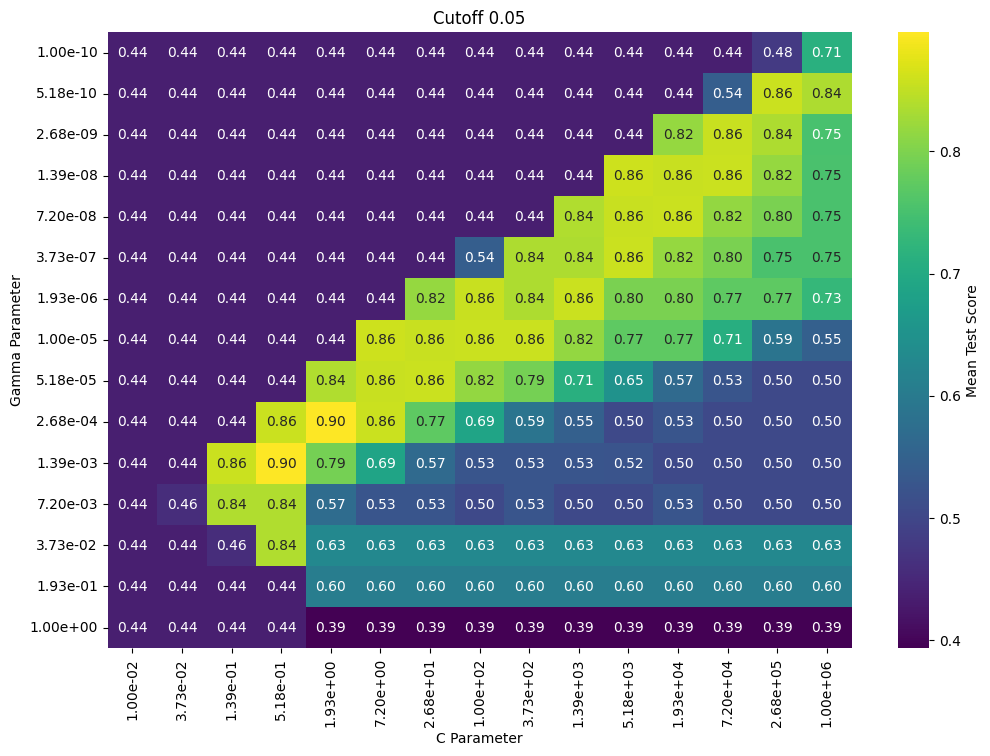

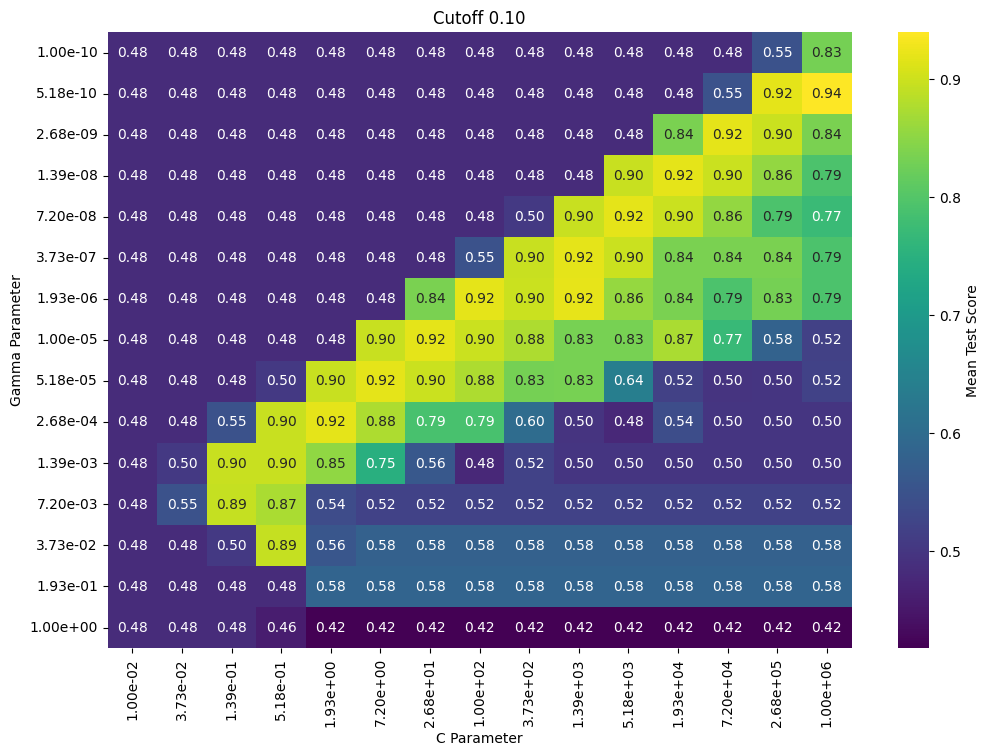

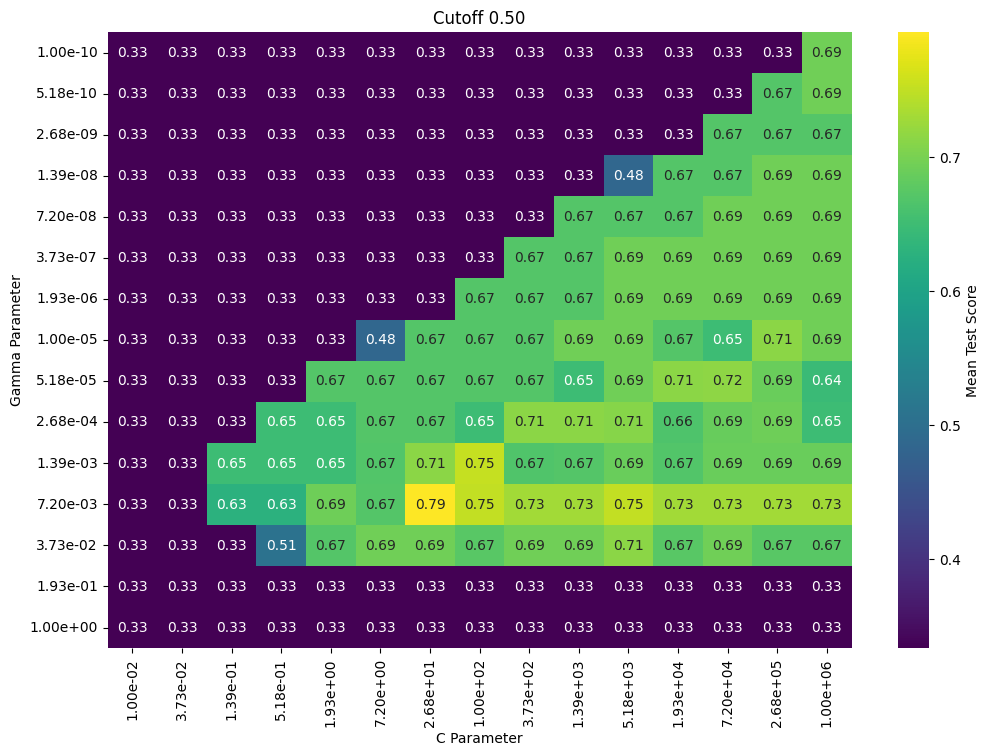

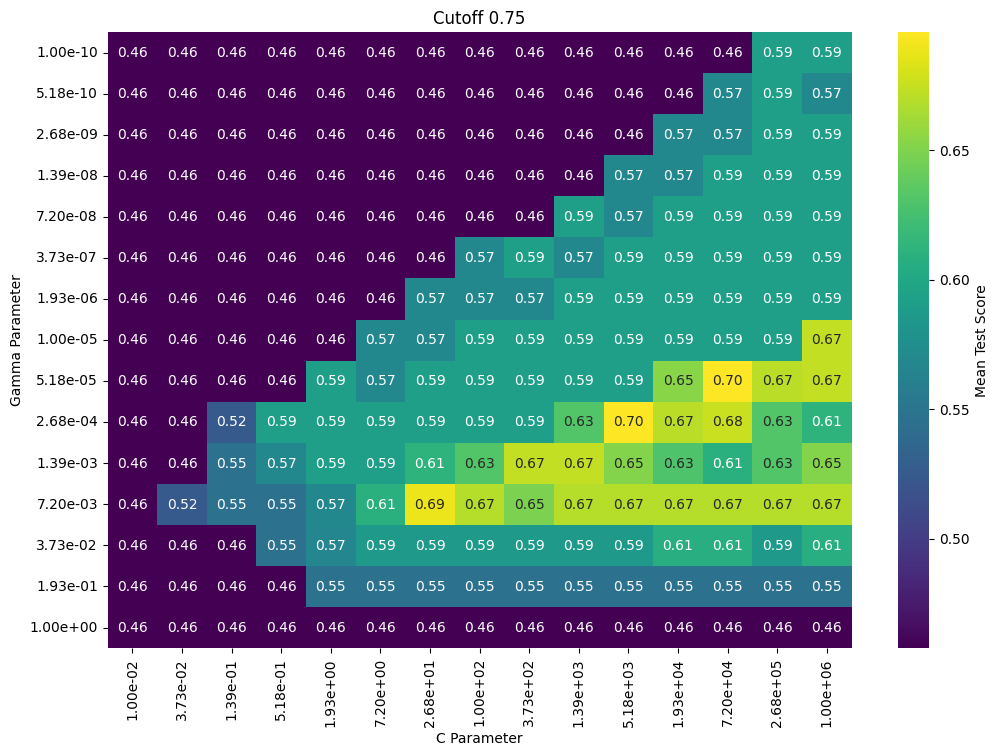

In [115]:
for i in fn_grid:
    with open(Path(r"models") / i[0], "rb") as f:
        results = pd.DataFrame(pickle.load(f).cv_results_)
    training_functions.plot_grid_search_results(results, title=f"Cutoff {i[1]:.2f}")

## model accuracies

In [116]:
fn_grid_all = os.listdir(r"models")
fn_grid = []
for fn in fn_grid_all:
    m = re.match(r"results_cutoff_(\d+\.\d+)\.csv", fn)
    if m:
        fn_grid.append([fn, float(m.group(1))])
fn_grid = sorted(fn_grid, key=lambda x: x[1])
print(f"Found {len(fn_grid)} grid search result files:")
fn_grid

Found 5 grid search result files:


[['results_cutoff_0.01.csv', 0.01],
 ['results_cutoff_0.05.csv', 0.05],
 ['results_cutoff_0.10.csv', 0.1],
 ['results_cutoff_0.50.csv', 0.5],
 ['results_cutoff_0.75.csv', 0.75]]

In [117]:
accuracies = []
thresholds = []
for i in fn_grid:
    res = pd.read_csv(Path(r"models") / i[0])
    acc = training_functions.tresh_gacc(res['label'], res['y_pred'], groups=res['patient_id'], cutoff=i[1])
    accuracies.append(acc)
    thresholds.append(i[1])

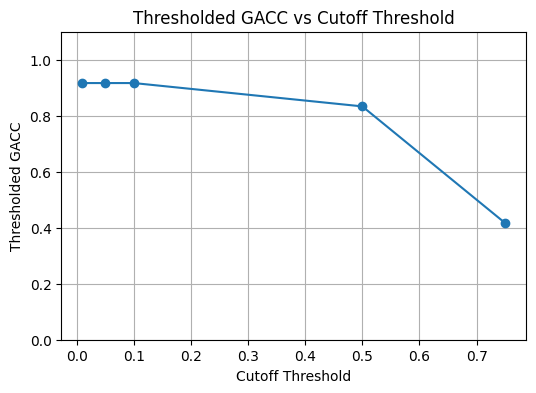

In [118]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(thresholds, accuracies, marker='o')
ax.set_xlabel('Cutoff Threshold')
ax.set_ylabel('Thresholded GACC')   
ax.set_title('Thresholded GACC vs Cutoff Threshold')
ax.grid()
ax.set_ylim(0, 1.1)
plt.show()